In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'D:\shanmukha data\Data Analytics\Task 1\air delay analysis\DelayedFlights.csv')

In [2]:
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.drop(df.columns[[0]],axis=1)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
#shape of the dataset
df.shape

(1936758, 29)

In [5]:
#Column info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [6]:
df.drop_duplicates(inplace=True)
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.count()

Year                 1936756
Month                1936756
DayofMonth           1936756
DayOfWeek            1936756
DepTime              1936756
CRSDepTime           1936756
ArrTime              1929646
CRSArrTime           1936756
UniqueCarrier        1936756
FlightNum            1936756
TailNum              1936751
ActualElapsedTime    1928369
CRSElapsedTime       1936558
AirTime              1928369
ArrDelay             1928369
DepDelay             1936756
Origin               1936756
Dest                 1936756
Distance             1936756
TaxiIn               1929646
TaxiOut              1936301
Cancelled            1936756
CancellationCode     1936756
Diverted             1936756
CarrierDelay         1247486
WeatherDelay         1247486
NASDelay             1247486
SecurityDelay        1247486
LateAircraftDelay    1247486
dtype: int64

In [8]:
df.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [9]:
df.dropna(axis=0,how='any',inplace=True)

In [10]:
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [11]:
#Date of flight

df.rename(columns={'DayofMonth':'Day'},inplace=True)
df['Day'] = df['Day'].astype('str')
df['Month'] = df['Month'].astype('str')
df['Year'] = df['Year'].astype('str')
df['Date'] = df['Year'] +'/'+ df['Month'] +'/'+ df['Day']

In [12]:
#dropping individual month,day and year columns

#df = df.drop(df.columns[[0,1,2]],axis=1)

In [13]:
#placing date as first column

datecol = df.pop('Date')

df.insert(0,'Date',datecol)
df

,Date,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008/1/3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008/1/3,2008,1,3,4,1937.0,1830,2037.0,1940,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,2008/1/3,2008,1,3,4,1644.0,1510,1845.0,1725,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,2008/1/3,2008,1,3,4,1452.0,1425,1640.0,1625,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,2008/1/3,2008,1,3,4,1323.0,1255,1526.0,1510,WN,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,2008/12/13,2008,12,13,6,921.0,830,1112.0,1008,DL,...,8.0,21.0,0,N,0,51.0,0.0,13.0,0.0,0.0
1936752,2008/12/13,2008,12,13,6,1552.0,1520,1735.0,1718,DL,...,9.0,7.0,0,N,0,0.0,0.0,0.0,0.0,17.0
1936753,2008/12/13,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008/12/13,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0


In [14]:
#converting arrival and departure time into date format

df['DepTime'] = df.DepTime.astype(int)
df['ArrTime'] = df.ArrTime.astype(int)
for col in ['DepTime','CRSDepTime','ArrTime','CRSArrTime' ]:
    df[col] = df[col].fillna('0000')
    df[col] = df[col].apply(lambda x: f'{int(x):04}')
    df[col] = df[col].apply(lambda x: x[:2]+':'+x[2:])

In [15]:
df

,Date,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008/1/3,2008,1,3,4,18:29,17:55,19:59,19:25,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008/1/3,2008,1,3,4,19:37,18:30,20:37,19:40,WN,...,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
7,2008/1/3,2008,1,3,4,16:44,15:10,18:45,17:25,WN,...,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
9,2008/1/3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,...,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0
11,2008/1/3,2008,1,3,4,13:23,12:55,15:26,15:10,WN,...,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936751,2008/12/13,2008,12,13,6,09:21,08:30,11:12,10:08,DL,...,8.0,21.0,0,N,0,51.0,0.0,13.0,0.0,0.0
1936752,2008/12/13,2008,12,13,6,15:52,15:20,17:35,17:18,DL,...,9.0,7.0,0,N,0,0.0,0.0,0.0,0.0,17.0
1936753,2008/12/13,2008,12,13,6,12:50,12:20,16:17,15:52,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008/12/13,2008,12,13,6,06:57,06:00,09:04,07:49,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0


In [16]:
#converting datatype for few columns

datatype_convert = {'CarrierDelay': int,
                'WeatherDelay': int,
                    'NASDelay':int,
                    'SecurityDelay':int,
                    'LateAircraftDelay':int,
                    'ActualElapsedTime':int,
                    'CRSElapsedTime':int,
                    'AirTime':int,
                    'ArrDelay':int,
                    'DepDelay':int,
                    'TaxiIn':int,
                    'TaxiOut':int
                     }
 
df = df.astype(datatype_convert)
print(df.dtypes)

Date                 object
Year                 object
Month                object
Day                  object
DayOfWeek             int64
DepTime              object
CRSDepTime           object
ArrTime              object
CRSArrTime           object
UniqueCarrier        object
FlightNum             int64
TailNum              object
ActualElapsedTime     int32
CRSElapsedTime        int32
AirTime               int32
ArrDelay              int32
DepDelay              int32
Origin               object
Dest                 object
Distance              int64
TaxiIn                int32
TaxiOut               int32
Cancelled             int64
CancellationCode     object
Diverted              int64
CarrierDelay          int32
WeatherDelay          int32
NASDelay              int32
SecurityDelay         int32
LateAircraftDelay     int32
dtype: object


In [17]:
df.describe()

,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1247484.0,1247484.0,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06,1.247484e+06
mean,3.980082e+00,2.276528e+03,1.353779e+02,1.317641e+02,1.074204e+02,6.329107e+01,5.967723e+01,7.415869e+02,7.297229e+00,2.066035e+01,0.0,0.0,1.917942e+01,3.703361e+00,1.502161e+01,9.013743e-02,2.529653e+01
std,1.993271e+00,1.997548e+03,7.229641e+01,6.953206e+01,6.817459e+01,6.075384e+01,5.986886e+01,5.593648e+02,6.033244e+00,1.667984e+01,0.0,0.0,4.354626e+01,2.149155e+01,3.383309e+01,2.022717e+00,4.205491e+01
min,1.000000e+00,1.000000e+00,1.400000e+01,-2.100000e+01,0.000000e+00,1.500000e+01,6.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,6.370000e+02,8.300000e+01,8.000000e+01,5.800000e+01,2.600000e+01,2.400000e+01,3.340000e+02,4.000000e+00,1.100000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.000000e+00,1.589000e+03,1.180000e+02,1.150000e+02,9.000000e+01,4.300000e+01,4.100000e+01,5.950000e+02,6.000000e+00,1.600000e+01,0.0,0.0,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,6.000000e+00,3.676000e+03,1.670000e+02,1.610000e+02,1.360000e+02,7.900000e+01,7.500000e+01,9.720000e+02,8.000000e+00,2.400000e+01,0.0,0.0,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.000000e+00,9.741000e+03,1.114000e+03,6.600000e+02,1.091000e+03,2.461000e+03,2.467000e+03,4.962000e+03,2.400000e+02,4.220000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


We can see that flight movement is more during sundays

In [18]:
df.describe(include='O')

,Date,Year,Month,Day,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,TailNum,Origin,Dest,CancellationCode
count,1247484,1247484,1247484,1247484,1247484,1247484,1247484,1247484,1247484,1247484,1247484,1247484,1247484
unique,366,1,12,31,1435,1182,1440,1350,20,5349,302,301,1
top,2008/12/1,2008,12,22,18:00,18:00,21:00,19:30,WN,N17175,ORD,ORD,N
freq,7998,1247484,141373,48632,2330,9595,2132,5991,203559,686,90611,79626,1247484


We can see Jan 2nd date appeared more no.of times.

Most of the flights movement happened during evening.

The WN airline company flights movement is more.

Most of the flights are not cancelled.

The flights from origin ATL and destination ORD are frequent locations of movement.

In [19]:
#value counts for each column

for col in df:
    print('-' * 40 + col + '-' * 40 , end=' - ')
    display(df[col].value_counts())

----------------------------------------Date---------------------------------------- - 

2008/12/1     7998
2008/12/23    7983
2008/12/21    7980
2008/11/30    7890
2008/12/22    7861
              ... 
2008/9/20      880
2008/10/18     855
2008/8/31      838
2008/11/28     746
2008/11/27     707
Name: Date, Length: 366, dtype: int64

----------------------------------------Year---------------------------------------- - 

2008    1247484
Name: Year, dtype: int64

----------------------------------------Month---------------------------------------- - 

12    141373
6     136515
3     130999
2     128741
1     120786
7     119404
8     100602
4      97624
5      94771
11     63785
10     57079
9      55805
Name: Month, dtype: int64

----------------------------------------Day---------------------------------------- - 

22    48632
21    46162
7     44638
1     44304
27    43195
4     42653
15    42138
8     41784
20    41761
10    41700
19    41385
18    41025
14    41022
23    40875
26    40871
11    40547
6     40290
2     40165
24    39726
17    39518
9     39449
13    39102
12    38941
16    38255
5     38226
3     38111
28    37842
25    36828
30    36452
29    35015
31    26872
Name: Day, dtype: int64

----------------------------------------DayOfWeek---------------------------------------- - 

5    214235
1    186860
4    186858
7    185184
2    169909
3    167704
6    136734
Name: DayOfWeek, dtype: int64

----------------------------------------DepTime---------------------------------------- - 

18:00    2330
20:00    2257
19:00    2241
17:00    2183
17:30    2124
         ... 
04:14       1
04:39       1
04:57       1
04:20       1
04:25       1
Name: DepTime, Length: 1435, dtype: int64

----------------------------------------CRSDepTime---------------------------------------- - 

18:00    9595
17:00    9287
19:00    8951
18:55    8662
18:50    8451
         ... 
00:14       1
00:31       1
23:43       1
23:44       1
01:40       1
Name: CRSDepTime, Length: 1182, dtype: int64

----------------------------------------ArrTime---------------------------------------- - 

21:00    2132
21:15    2037
20:30    2036
21:45    2017
22:00    2016
         ... 
04:52       8
05:08       8
04:51       6
04:37       5
04:54       2
Name: ArrTime, Length: 1440, dtype: int64

----------------------------------------CRSArrTime---------------------------------------- - 

19:30    5991
20:15    5931
20:00    5807
20:05    5603
20:45    5548
         ... 
02:32       1
01:20       1
04:02       1
02:00       1
02:27       1
Name: CRSArrTime, Length: 1350, dtype: int64

----------------------------------------UniqueCarrier---------------------------------------- - 

WN    203559
AA    132257
MQ     97555
UA     95465
OO     88991
DL     72252
XE     72008
US     59508
CO     58958
EV     56781
NW     54744
YV     50646
FL     46991
OH     39292
B6     38232
9E     35630
AS     24012
F9     15938
HA      4325
AQ       340
Name: UniqueCarrier, dtype: int64

----------------------------------------FlightNum---------------------------------------- - 

50      1053
321      930
75       922
16       915
40       902
        ... 
7712       1
7477       1
6249       1
6268       1
9741       1
Name: FlightNum, Length: 7481, dtype: int64

----------------------------------------TailNum---------------------------------------- - 

N17175    686
N77278    679
N87353    678
N37208    665
N37342    660
         ... 
N853NW      1
N104UA      1
N78003      1
N118UA      1
N78008      1
Name: TailNum, Length: 5349, dtype: int64

----------------------------------------ActualElapsedTime---------------------------------------- - 

80     10854
75     10706
85     10524
90     10123
78     10093
       ...  
602        1
621        1
698        1
670        1
653        1
Name: ActualElapsedTime, Length: 668, dtype: int64

----------------------------------------CRSElapsedTime---------------------------------------- - 

75     31646
65     31382
70     30783
85     30664
80     29624
       ...  
21         1
23         1
461        1
1          1
513        1
Name: CRSElapsedTime, Length: 497, dtype: int64

----------------------------------------AirTime---------------------------------------- - 

45     11778
52     11700
50     11687
46     11665
48     11660
       ...  
652        1
655        1
632        1
651        1
631        1
Name: AirTime, Length: 645, dtype: int64

----------------------------------------ArrDelay---------------------------------------- - 

15      32476
16      31198
17      30288
18      29816
19      28658
        ...  
1707        1
1018        1
734         1
978         1
991         1
Name: ArrDelay, Length: 1044, dtype: int64

----------------------------------------DepDelay---------------------------------------- - 

25      23106
20      22956
30      21884
15      20195
22      19966
        ...  
1357        1
569         1
842         1
937         1
925         1
Name: DepDelay, Length: 1053, dtype: int64

----------------------------------------Origin---------------------------------------- - 

ORD    90611
ATL    87741
DFW    62073
DEN    46476
EWR    36115
       ...  
BJI        3
PUB        2
BLI        2
INL        1
PIR        1
Name: Origin, Length: 302, dtype: int64

----------------------------------------Dest---------------------------------------- - 

ORD    79626
ATL    71607
DFW    45964
EWR    40873
DEN    38612
       ...  
ITH       13
INL        9
BLI        7
BJI        4
PIR        1
Name: Dest, Length: 301, dtype: int64

----------------------------------------Distance---------------------------------------- - 

337     8570
733     6518
761     5923
403     5890
296     5605
        ... 
111        1
1405       1
186        1
99         1
890        1
Name: Distance, Length: 1404, dtype: int64

----------------------------------------TaxiIn---------------------------------------- - 

5      195335
4      195098
6      152400
3      138217
7      116330
        ...  
144         1
165         1
156         1
149         1
139         1
Name: TaxiIn, Length: 180, dtype: int64

----------------------------------------TaxiOut---------------------------------------- - 

11     72499
12     72076
10     71801
13     69667
14     65582
       ...  
260        1
298        1
264        1
422        1
370        1
Name: TaxiOut, Length: 332, dtype: int64

----------------------------------------Cancelled---------------------------------------- - 

0    1247484
Name: Cancelled, dtype: int64

----------------------------------------CancellationCode---------------------------------------- - 

N    1247484
Name: CancellationCode, dtype: int64

----------------------------------------Diverted---------------------------------------- - 

0    1247484
Name: Diverted, dtype: int64

----------------------------------------CarrierDelay---------------------------------------- - 

0       591047
6        22799
7        21500
15       20361
8        19506
         ...  
928          1
940          1
684          1
1096         1
905          1
Name: CarrierDelay, Length: 983, dtype: int64

----------------------------------------WeatherDelay---------------------------------------- - 

0      1148567
10        2868
6         2738
15        2709
7         2527
        ...   
435          1
516          1
553          1
523          1
396          1
Name: WeatherDelay, Length: 599, dtype: int64

----------------------------------------NASDelay---------------------------------------- - 

0      588994
1       34060
2       33177
3       31615
4       29825
        ...  
838         1
768         1
683         1
919         1
413         1
Name: NASDelay, Length: 574, dtype: int64

----------------------------------------SecurityDelay---------------------------------------- - 

0      1241479
7          350
6          327
8          286
9          278
        ...   
284          1
100          1
149          1
156          1
254          1
Name: SecurityDelay, Length: 156, dtype: int64

----------------------------------------LateAircraftDelay---------------------------------------- - 

0       555903
15       18632
16       17315
17       16393
18       15550
         ...  
500          1
535          1
850          1
501          1
1000         1
Name: LateAircraftDelay, Length: 564, dtype: int64

In [20]:
df_sample = df.head(20000)
df_sample

,Date,Year,Month,Day,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
3,2008/1/3,2008,1,3,4,18:29,17:55,19:59,19:25,WN,...,3,10,0,N,0,2,0,0,0,32
5,2008/1/3,2008,1,3,4,19:37,18:30,20:37,19:40,WN,...,3,7,0,N,0,10,0,0,0,47
7,2008/1/3,2008,1,3,4,16:44,15:10,18:45,17:25,WN,...,6,8,0,N,0,8,0,0,0,72
9,2008/1/3,2008,1,3,4,14:52,14:25,16:40,16:25,WN,...,7,8,0,N,0,3,0,0,0,12
11,2008/1/3,2008,1,3,4,13:23,12:55,15:26,15:10,WN,...,4,9,0,N,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35244,2008/1/24,2008,1,24,4,20:17,19:37,21:34,21:04,XE,...,6,13,0,N,0,0,9,0,0,21
35245,2008/1/2,2008,1,2,3,17:39,16:50,20:37,18:25,XE,...,10,102,0,N,0,0,0,132,0,0
35246,2008/1/1,2008,1,1,2,20:05,18:40,23:12,21:00,XE,...,36,8,0,N,0,0,5,47,0,80
35249,2008/1/11,2008,1,11,5,17:22,15:20,18:55,17:08,XE,...,5,12,0,N,0,6,0,0,0,101


In [21]:
plot_color = "#dd0033"
title_color = "#333333"
y_title_margin=1.0
left = 0.10
right=0.95
bottom=0.1
top=0.5
wspace=0.1
hspace=0.6

plt.subplots_adjust(
left=left,
right=right,
bottom=bottom,
top=top,
wspace=wspace,
hspace=hspace)

sns.set_style("whitegrid")

<Figure size 432x288 with 0 Axes>

# Univariant Analysis

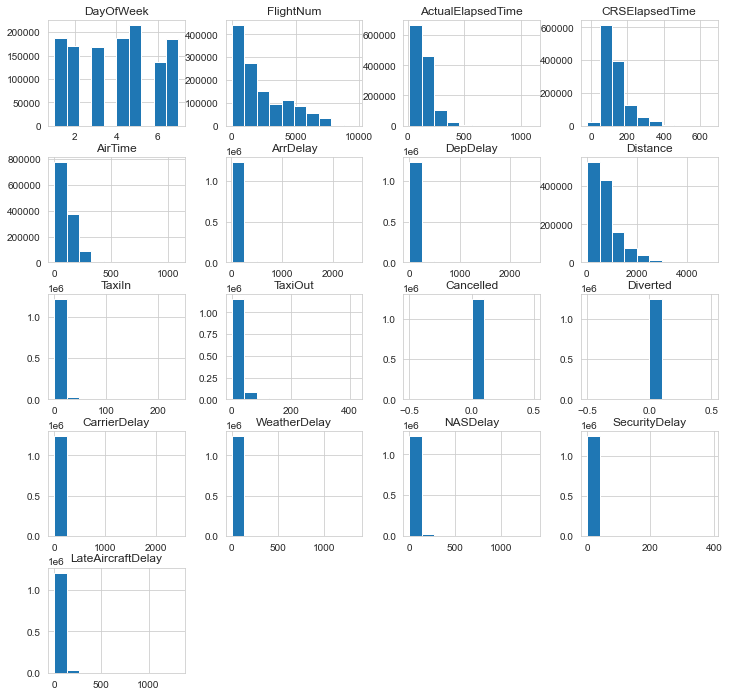

In [42]:
df.hist(figsize=(12,12));

This shows an overall distribution of each attribute.

DayOfWeek               AxesSubplot(0.125,0.749828;0.133621x0.130172)
FlightNum            AxesSubplot(0.285345,0.749828;0.133621x0.130172)
ActualElapsedTime     AxesSubplot(0.44569,0.749828;0.133621x0.130172)
CRSElapsedTime       AxesSubplot(0.606034,0.749828;0.133621x0.130172)
AirTime              AxesSubplot(0.766379,0.749828;0.133621x0.130172)
ArrDelay                AxesSubplot(0.125,0.593621;0.133621x0.130172)
DepDelay             AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Distance              AxesSubplot(0.44569,0.593621;0.133621x0.130172)
TaxiIn               AxesSubplot(0.606034,0.593621;0.133621x0.130172)
TaxiOut              AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Cancelled               AxesSubplot(0.125,0.437414;0.133621x0.130172)
Diverted             AxesSubplot(0.285345,0.437414;0.133621x0.130172)
CarrierDelay          AxesSubplot(0.44569,0.437414;0.133621x0.130172)
WeatherDelay         AxesSubplot(0.606034,0.437414;0.133621x0.130172)
NASDelay            

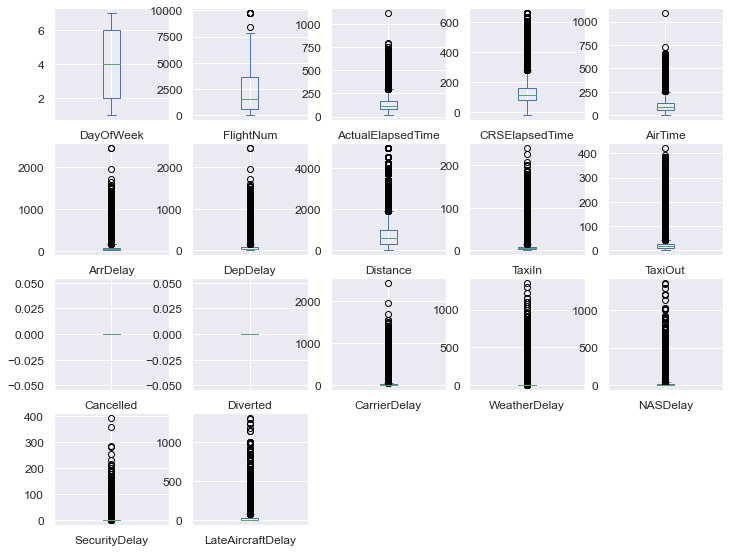

In [51]:
df.plot(kind='box', subplots=True,layout=(5,5),fontsize=12,figsize=(12,12))a

<AxesSubplot:>

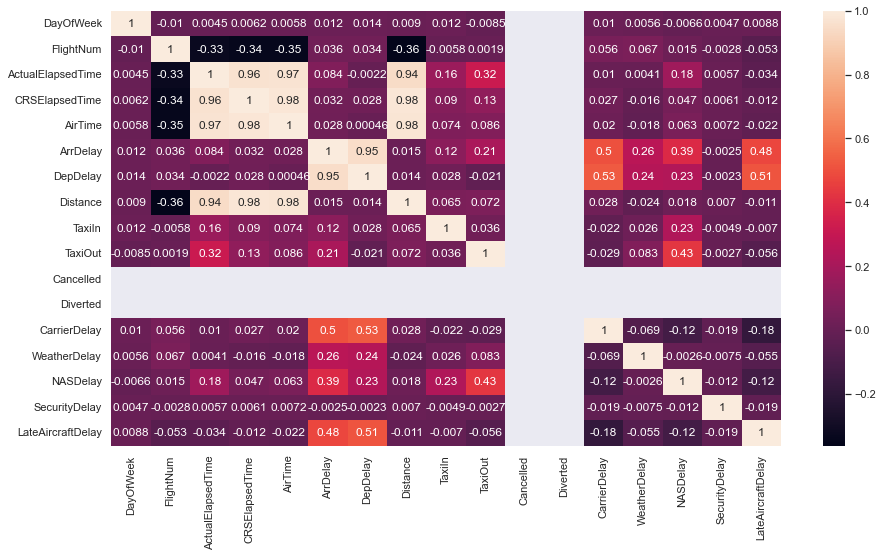

In [48]:
corelation=df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

The attributes Actual Elapsed Time, CRS Elapsed Time, Air Time and Distance are highly correlated with each other.

Looking into the delays, the delay is not much due to the security delay indicating the airport authorities are maintaining good.

The delay in arrival of flight is effected mostly by the carrier delay, NAS Delay and Late Aircraft Delay.

The delay in departure of flight is effected mostly by the Carrier Delay and Late Aircraft Delay.

We can also observed that the delay due to weather is very less.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


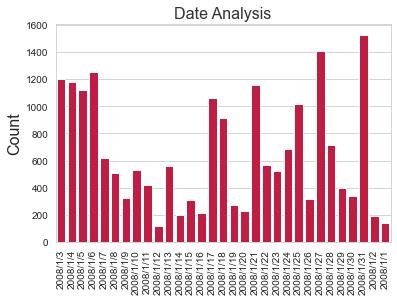

In [22]:
date_hist = sns.countplot(df_sample['Date'],color=plot_color)
date_hist.set_xticklabels(date_hist.get_xticklabels(),rotation=90)
date_hist.set_xlabel('')
date_hist.set_ylabel('Count',fontsize=16)

ax=date_hist.axes
ax.patch.set_alpha(0)
ax.set_title('Date Analysis',fontsize=16,color='#333333')
fig=date_hist.get_figure()
fig.figsize=(50,20)
fig.patch.set_alpha(0.5)

Analysing the data sample of 20000 records.

From the data considered, Jan 31st has highest number of flight movement.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


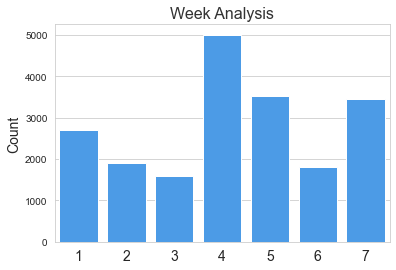

In [23]:
week_dist=sns.countplot(df_sample['DayOfWeek'],color='#339CFF')
week_dist.set_xticklabels(week_dist.get_xticklabels(), fontsize=14)
week_dist.set_xlabel('')
week_dist.set_ylabel('Count', fontsize=14)

ax=week_dist.axes
ax.patch.set_alpha(0)
ax.set_title('Week Analysis',fontsize=16,color='#333333')
fig=week_dist.get_figure()
fig.figsize=(15,8)
fig.patch.set_alpha(0.5)

It can be observed that the flight movement is more on Thursday followed by friday and sunday.

We can see during the weekends the people are travelling more.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


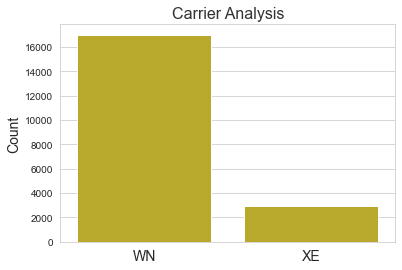

In [24]:
carrier_dist=sns.countplot(df_sample['UniqueCarrier'],color='#CFBB16')
carrier_dist.set_xticklabels(carrier_dist.get_xticklabels(), fontsize=14)
carrier_dist.set_xlabel('')
carrier_dist.set_ylabel('Count', fontsize=14)

ax=carrier_dist.axes
ax.patch.set_alpha(0)
ax.set_title('Carrier Analysis',fontsize=16,color='#333333')
fig=week_dist.get_figure()
fig.figsize=(15,8)
fig.patch.set_alpha(0.5)

In the data considered, large number of flights belong to WN airline company and few of XE.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


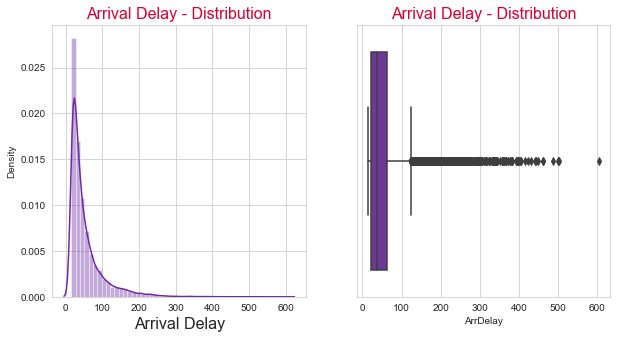

In [25]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
fig.patch.set_alpha(0.5)
ax[0].set_title("Arrival Delay - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[0].patch.set_alpha(0)
ad_hist=sns.distplot(df_sample['ArrDelay'], hist=True, color='#6E29A7', ax=ax[0] )
ad_hist.set_xlabel('Arrival Delay',fontsize=16)
ax[1].set_title("Arrival Delay - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(df_sample['ArrDelay'], color='#6E29A7', ax=ax[1] )
plt.show()


The arrival delay is positively skewed. There are many outliers present.

It can be observed that the delay for arrival is not more than 100 minutes timeframe for most of the flights.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


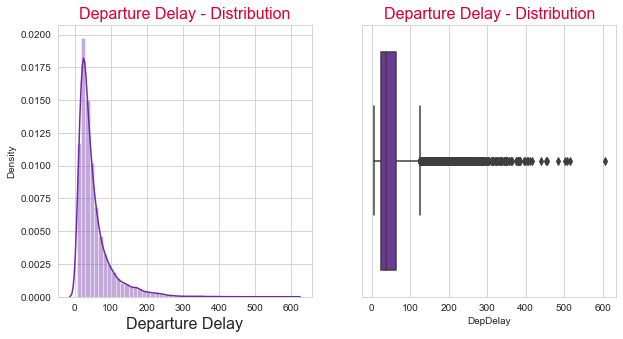

In [26]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
fig.patch.set_alpha(0.5)
ax[0].set_title("Departure Delay - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[0].patch.set_alpha(0)
dd_hist=sns.distplot(df_sample['DepDelay'], hist=True, color='#6E29A7', ax=ax[0] )
dd_hist.set_xlabel('Departure Delay',fontsize=16)
ax[1].set_title("Departure Delay - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(df_sample['DepDelay'], color='#6E29A7', ax=ax[1] )
plt.show()


Departure Delay follows the same pattern as arrival delay with positive skewness and most of the flights not getting delayed for more than 100 minutes time frame.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


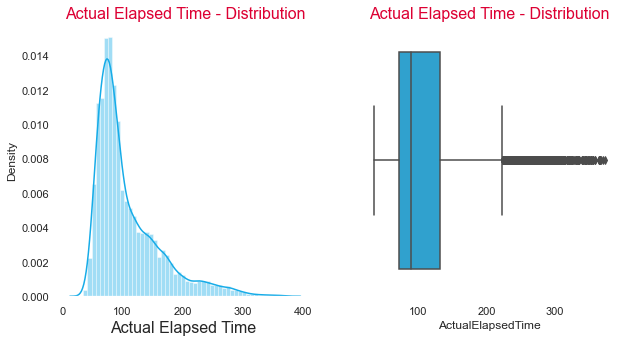

In [55]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
fig.patch.set_alpha(0.5)
ax[0].set_title("Actual Elapsed Time - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[0].patch.set_alpha(0)
dd_hist=sns.distplot(df_sample['ActualElapsedTime'], hist=True, color='#16ACE8', ax=ax[0] )
dd_hist.set_xlabel('Actual Elapsed Time ',fontsize=16)
ax[1].set_title("Actual Elapsed Time - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(df_sample['ActualElapsedTime'], color='#16ACE8', ax=ax[1] )
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


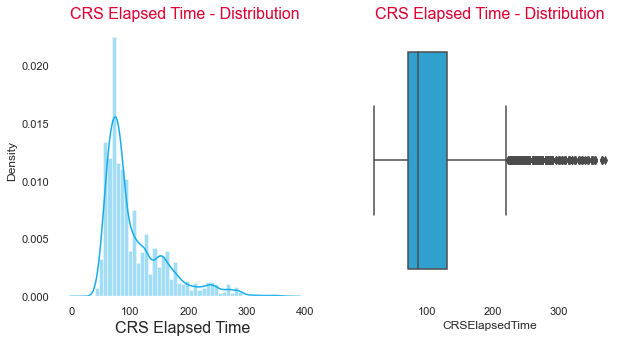

In [56]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
fig.patch.set_alpha(0.5)
ax[0].set_title("CRS Elapsed Time - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[0].patch.set_alpha(0)
dd_hist=sns.distplot(df_sample['CRSElapsedTime'], hist=True, color='#16ACE8', ax=ax[0] )
dd_hist.set_xlabel('CRS Elapsed Time ',fontsize=16)
ax[1].set_title("CRS Elapsed Time - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(df_sample['CRSElapsedTime'], color='#16ACE8', ax=ax[1] )
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


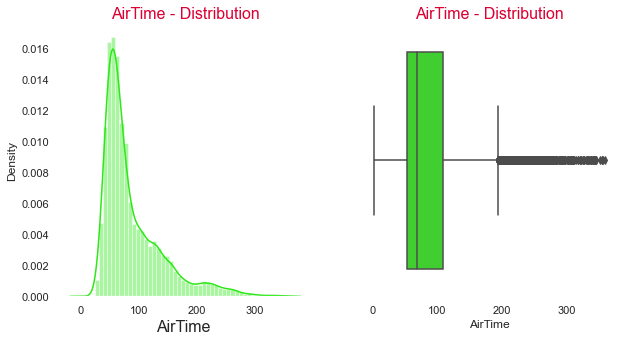

In [57]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
fig.patch.set_alpha(0.5)
ax[0].set_title("AirTime - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[0].patch.set_alpha(0)
dd_hist=sns.distplot(df_sample['AirTime'], hist=True, color='#2CE816', ax=ax[0] )
dd_hist.set_xlabel('AirTime ',fontsize=16)
ax[1].set_title("AirTime - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(df_sample['AirTime'], color='#2CE816', ax=ax[1] )
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


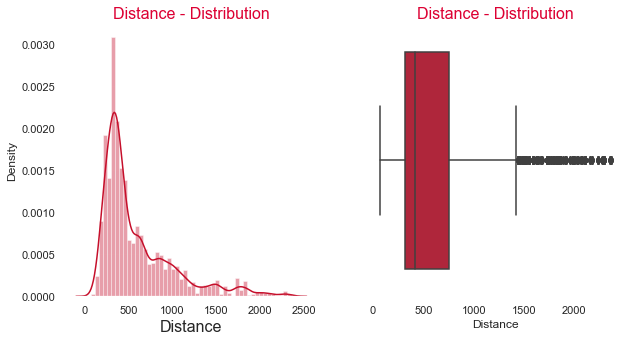

In [58]:
fig, ax = plt.subplots(figsize=(10,5), ncols=2, nrows=1)
fig.patch.set_alpha(0.5)
ax[0].set_title("Distance - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[0].patch.set_alpha(0)
dd_hist=sns.distplot(df_sample['Distance'], hist=True, color='#C60F2B', ax=ax[0] )
dd_hist.set_xlabel('Distance',fontsize=16)
ax[1].set_title("Distance - Distribution", y = y_title_margin, color=plot_color,fontsize=16)
ax[1].patch.set_alpha(0)
hp_box=sns.boxplot(df_sample['Distance'], color='#C60F2B', ax=ax[1] )
plt.show()

In [27]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]
figalpha = 0.5
axalpha = 0
left = 0.10 # the left side of the subplots of the figure
right = 0.95 # the right side of the subplots of the figure
bottom = 0.2 # the bottom of the subplots of the figure
top = 0.3 # the top of the subplots of the figure
wspace = 0.1 # the amount of width reserved for blank space between subplots
hspace = 0.1 # the amount of height reserved for white space between subplots
y_title_margin = 1.0 # The amount of space above titles

# Bivariant Analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


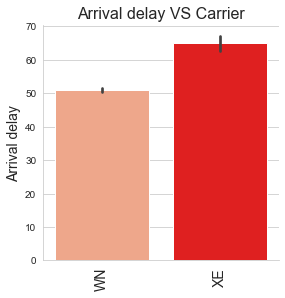

In [28]:
plot_color = "#dd0033"
palette = ["#FFA07A","#FF0000", "#dd0033","#800000","#DB7093"]
gax1=sns.factorplot(x="UniqueCarrier",y="ArrDelay", data=df_sample,kind="bar", palette=palette,dodge=False,size=4, aspect=1,)

gax1.facet_axis(0,0).set_title("Arrival delay VS Carrier", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("Arrival delay", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


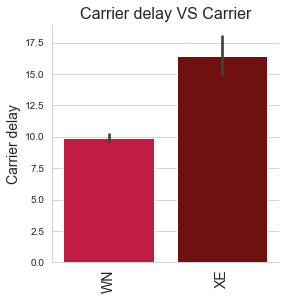

In [29]:
plot_color = "#dd0033"
palette = ["#dd0033","#800000","#FFA07A","#FF0000","#DB7093"]
gax1=sns.factorplot(x="UniqueCarrier",y="CarrierDelay", data=df_sample,kind="bar", palette=palette,dodge=False,size=4, aspect=1,)

gax1.facet_axis(0,0).set_title("Carrier delay VS Carrier", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("Carrier delay", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


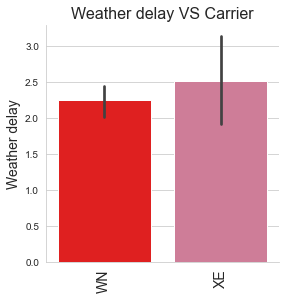

In [30]:
plot_color = "#dd0033"
palette = ["#FF0000","#DB7093"]
gax1=sns.factorplot(x="UniqueCarrier",y="WeatherDelay", data=df_sample,kind="bar", palette=palette,dodge=False,size=4, aspect=1,)

gax1.facet_axis(0,0).set_title("Weather delay VS Carrier", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("Weather delay", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


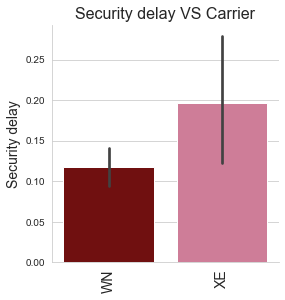

In [31]:
plot_color = "#dd0033"
palette = ["#800000","#DB7093"]
gax1=sns.factorplot(x="UniqueCarrier",y="SecurityDelay", data=df_sample,kind="bar", palette=palette,dodge=False,size=4, aspect=1,)

gax1.facet_axis(0,0).set_title("Security delay VS Carrier", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("Security delay", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


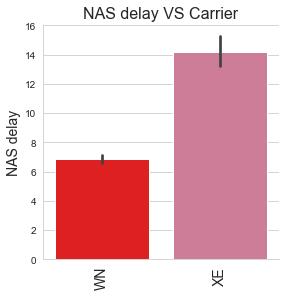

In [32]:
plot_color = "#dd0033"
palette = ["#FF0000","#DB7093"]
gax1=sns.factorplot(x="UniqueCarrier",y="NASDelay", data=df_sample,kind="bar", palette=palette,dodge=False,size=4, aspect=1,)

gax1.facet_axis(0,0).set_title("NAS delay VS Carrier", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("NAS delay", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


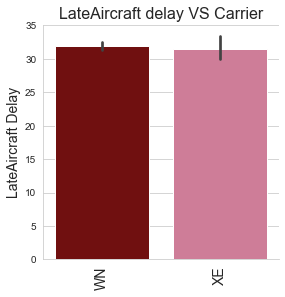

In [33]:
plot_color = "#dd0033"
palette = ["#800000","#DB7093"]
gax1=sns.factorplot(x="UniqueCarrier",y="LateAircraftDelay", data=df_sample,kind="bar", palette=palette,dodge=False,size=4, aspect=1,)

gax1.facet_axis(0,0).set_title("LateAircraft delay VS Carrier", fontsize=16)
gax1.facet_axis(0,0).set_ylabel("LateAircraft Delay", fontsize=14)
gax1.facet_axis(0,0).set_xlabel("")
gax1.facet_axis(0,0).patch.set_alpha(axalpha)
gax1.facet_axis(0,0).set_xticklabels(gax1.facet_axis(0,0).get_xticklabels(), rotation=90, fontsize=14)
gax1.fig.patch.set_alpha(figalpha)
plt.show()

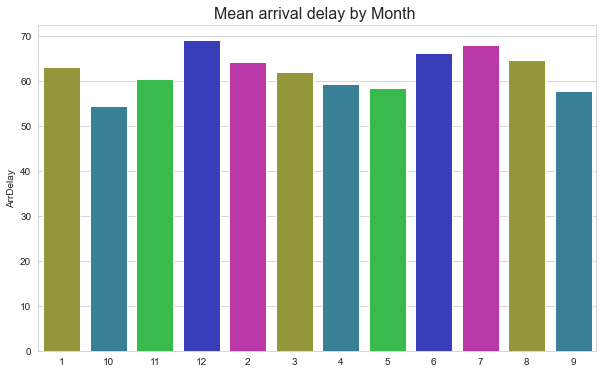

In [34]:
plot_color = "#dd0033"
palette = ["#A1A729","#2988A7", "#22D03D","#222AD0","#D022B8"]
fig, ax = plt.subplots(figsize=(10,6), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(0)
ax.set_title("Mean arrival delay by Month ", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
grp1=df.groupby('Month')['ArrDelay'].mean().reset_index()
gax=sns.barplot(y='ArrDelay', x='Month', data=grp1, palette=palette, ax=ax)
ax.set_xlabel('Mean arrival delay',fontsize=14 )
ax.set_xlabel('',fontsize=14)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


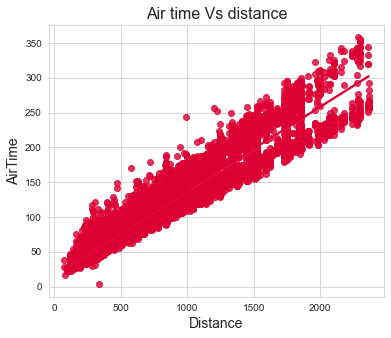

In [35]:
Fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(0.5)
ax.set_title("Air time Vs distance", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot("Distance",'AirTime', data=df_sample, color=plot_color)
gax8.set_ylabel('AirTime',fontsize=14 )
gax8.set_xlabel('Distance',fontsize=14)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


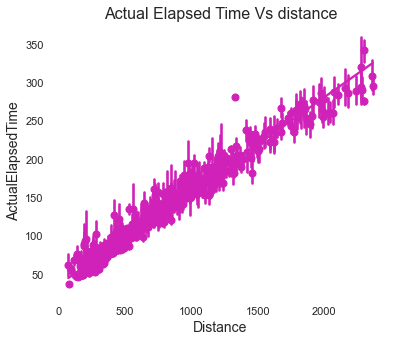

In [59]:
Fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(0.5)
ax.set_title("Actual Elapsed Time Vs distance", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot("Distance",'ActualElapsedTime', data=df_sample, color='#D022B8',x_estimator=np.mean)
gax8.set_ylabel('ActualElapsedTime',fontsize=14 )
gax8.set_xlabel('Distance',fontsize=14)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


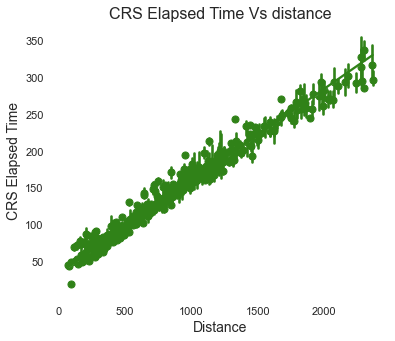

In [62]:
Fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(0.5)
ax.set_title("CRS Elapsed Time Vs distance", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot("Distance",'CRSElapsedTime', data=df_sample, color='#308218',x_estimator=np.mean)
gax8.set_ylabel('CRS Elapsed Time',fontsize=14 )
gax8.set_xlabel('Distance',fontsize=14)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


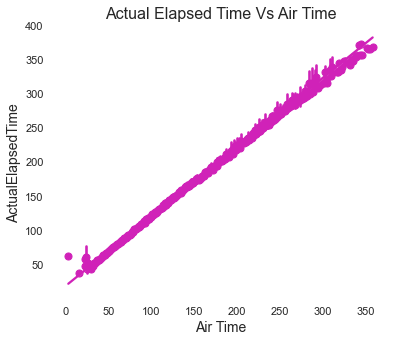

In [64]:
Fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(0.5)
ax.set_title("Actual Elapsed Time Vs Air Time", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot('AirTime', "ActualElapsedTime",data=df_sample, color='#D022B8',x_estimator=np.mean)
gax8.set_ylabel('ActualElapsedTime ',fontsize=14 )
gax8.set_xlabel('Air Time',fontsize=14)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


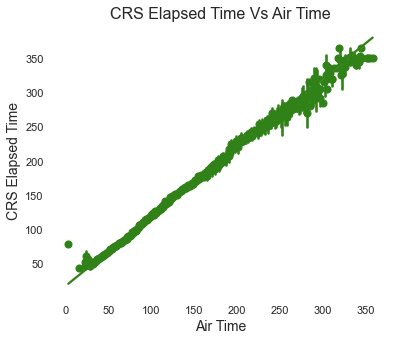

In [63]:
Fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(0.5)
ax.set_title("CRS Elapsed Time Vs Air Time", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot('AirTime', "CRSElapsedTime",data=df_sample, color='#308218',x_estimator=np.mean)
gax8.set_ylabel('CRS Elapsed Time',fontsize=14 )
gax8.set_xlabel('Air Time',fontsize=14)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


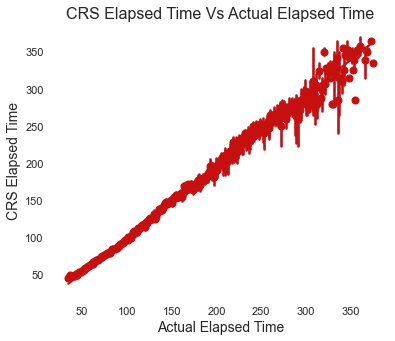

In [67]:
Fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(0.5)
ax.set_title("CRS Elapsed Time Vs Actual Elapsed Time", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot('ActualElapsedTime', "CRSElapsedTime",data=df_sample, color='#C60F0F',x_estimator=np.mean)
gax8.set_ylabel('CRS Elapsed Time',fontsize=14 )
gax8.set_xlabel('Actual Elapsed Time',fontsize=14)
plt.show()

In [40]:
df_sample['waitperiod'] = df_sample['ArrDelay'] - df_sample['DepDelay']

C:\Users\DELL\AppData\Local\Temp\ipykernel_16264\2016788372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['waitperiod'] = df_sample['ArrDelay'] - df_sample['DepDelay']


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


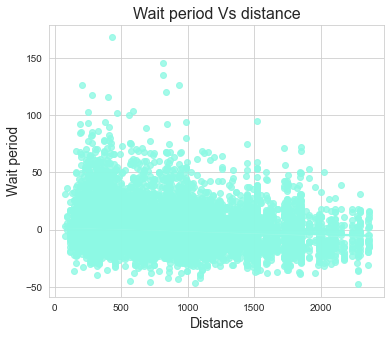

In [41]:
Fig, ax = plt.subplots(figsize=(6,5), ncols=1, nrows=1) # get the figure and axes objects 
fig.patch.set_alpha(0.5)
ax.set_title("Wait period Vs distance", y = y_title_margin, fontsize=16)
ax.patch.set_alpha(0)
gax8=sns.regplot("Distance", 'waitperiod',data=df_sample, color="#8DF9E4")
gax8.set_ylabel('Wait period',fontsize=14 )
gax8.set_xlabel('Distance',fontsize=14)
plt.show()

In [70]:
df.columns

Index(['Date', 'Year', 'Month', 'Day', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

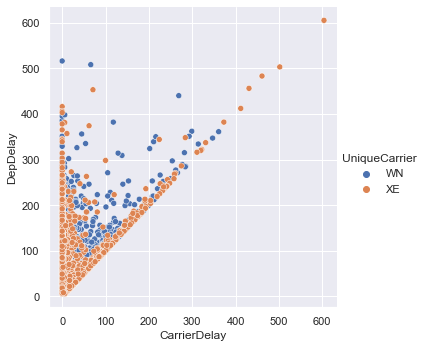

In [73]:
sns.relplot(x="CarrierDelay",y="DepDelay",hue="UniqueCarrier",kind='scatter', data= df_sample)

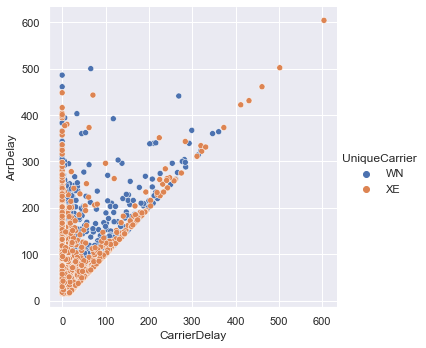

In [96]:
sns.relplot(x="CarrierDelay",y="ArrDelay",hue="UniqueCarrier",kind='scatter', data= df_sample)

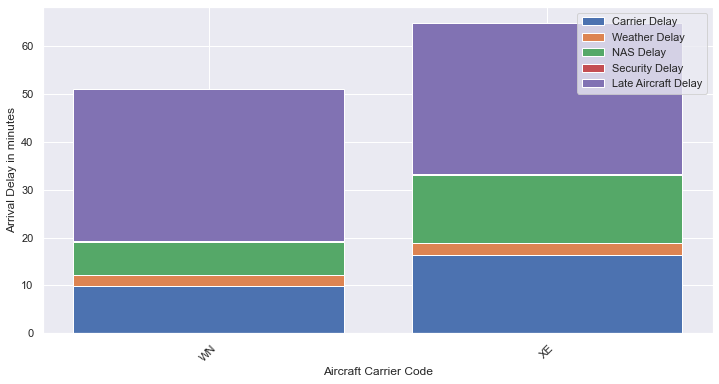

In [75]:
df_sample['total_delay'] = (df_sample['CarrierDelay'] + df_sample['WeatherDelay']
             + df_sample['NASDelay'] + df_sample['SecurityDelay'] + df_sample['LateAircraftDelay'])

df_sample = df_sample[~np.isnan(df_sample['total_delay'])]
df_sample['total_delay'].fillna(0, inplace=True)
df_sample.head()

carrier_group = df_sample['CarrierDelay'].groupby(df_sample['UniqueCarrier']).mean()
weather_group = df_sample['WeatherDelay'].groupby(df_sample['UniqueCarrier']).mean()
nas_group = df_sample['NASDelay'].groupby(df_sample['UniqueCarrier']).mean()
security_group = df_sample['SecurityDelay'].groupby(df_sample['UniqueCarrier']).mean()
late_group = df_sample['LateAircraftDelay'].groupby(df_sample['UniqueCarrier']).mean()

w_bottom = carrier_group.values
n_bottom = w_bottom + weather_group.values
s_bottom = n_bottom + nas_group.values
l_bottom = s_bottom + security_group.values

x = carrier_group.index.values

fig, ax = plt.subplots(figsize = (12,6))

ax.set_xticks(np.arange(len(x)))
ax.set_xticklabels(x, rotation = 45)
ax.bar(np.arange(len(x)),carrier_group.values, align='center', label='Carrier Delay')
ax.bar(np.arange(len(x)),weather_group.values, align='center', bottom=w_bottom, label='Weather Delay')
ax.bar(np.arange(len(x)),nas_group.values, align='center', bottom=n_bottom, label='NAS Delay')
ax.bar(np.arange(len(x)),security_group.values, align='center', bottom=s_bottom, label='Security Delay')
ax.bar(np.arange(len(x)),late_group.values, align='center', bottom=l_bottom, label='Late Aircraft Delay')

ax.set_xlabel('Aircraft Carrier Code')
ax.set_ylabel('Arrival Delay in minutes')

plt.legend()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_16264\2325828451.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cb1, ax=ax)


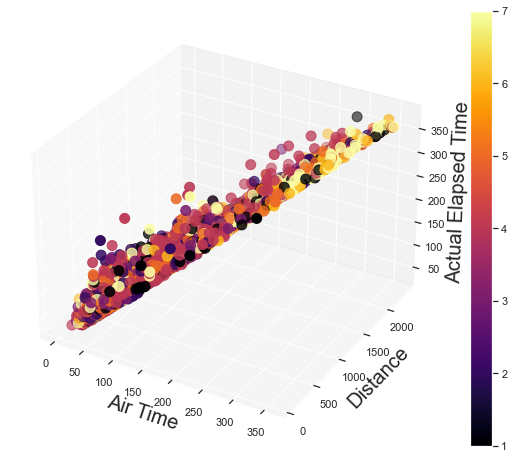

In [84]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111, projection='3d')
ax.patch.set_alpha(0)
x = df_sample['AirTime']
y = df_sample['Distance']
z = df_sample['ActualElapsedTime']
color = df_sample['DayOfWeek']
cb1=ax.scatter(x, y, z, c=color, cmap=plt.cm.get_cmap('inferno'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('Air Time',fontsize=20)
ax.set_ylabel('Distance',fontsize=20)
ax.set_zlabel('Actual Elapsed Time',fontsize=20)
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_16264\3398769423.py:11: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cb1, ax=ax)


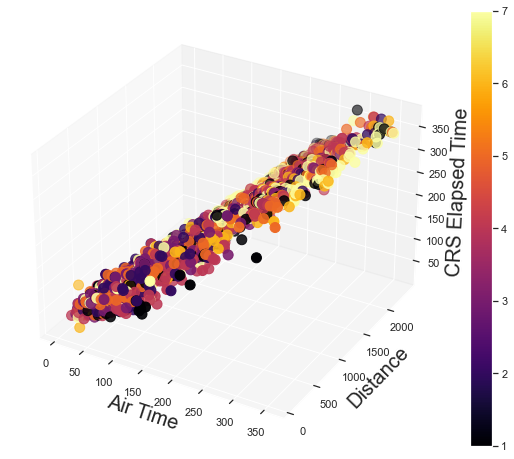

In [85]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111, projection='3d')
ax.patch.set_alpha(0)
x = df_sample['AirTime']
y = df_sample['Distance']
z = df_sample['CRSElapsedTime']
color = df_sample['DayOfWeek']
cb1=ax.scatter(x, y, z, c=color, cmap=plt.cm.get_cmap('inferno'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('Air Time',fontsize=20)
ax.set_ylabel('Distance',fontsize=20)
ax.set_zlabel('CRS Elapsed Time',fontsize=20)
plt.show()